# Plan
- Intial observations 
- Handle missing values by selecting arbitrary value for it
- Handle catagorical variables
- Handle model
- Make predictions
- Make improvements to model
- Statistical analysis on features 
- Make changes to features
- Make improvements to predictions


# Initial observations

In [755]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [756]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [757]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [758]:
train.shape

(1460, 81)

In [759]:
test.shape

(1459, 80)

In [760]:
train_test_df = [train, test]

### Remove columns which contain more than half nan values

This is because it is very hard for us to guess the values for these columns as most of the data is not present.

In [761]:
drop_cols = [col for col in train.columns if train[col].isnull().sum() > 1460/2]
drop_cols

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [762]:
for dataset in train_test_df:
    dataset.drop(drop_cols, axis=1, inplace=True)

# Missing Values

- numerical values --> Use mean
- catagorical values --> Use mode
- columns where they specify that houses may be missing this feature --> Use 'None'

In [763]:
missing_cols_train = [col for col in train.columns if train[col].isnull().any()]
missing_cols_test = [col for col in test.columns if test[col].isnull().any()]

In [764]:
train[missing_cols_train].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   FireplaceQu   770 non-null    object 
 10  GarageType    1379 non-null   object 
 11  GarageYrBlt   1379 non-null   float64
 12  GarageFinish  1379 non-null   object 
 13  GarageQual    1379 non-null   object 
 14  GarageCond    1379 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


### MasVnrType

I was thinking that those houses that don't have certain features should be assigned -1. But let's see.

For MasVnrType, since it contains a None value, we can use the mode method.

In [765]:
train['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [766]:
test['MasVnrType'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [767]:
for dataset in train_test_df:
    dataset['MasVnrType'] = dataset['MasVnrType'].fillna(dataset['MasVnrType'].mode()[0])

### MasVnrArea

For MasVnrArea, we can also use mode since there are 0 values.

In [768]:
train['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [769]:
for dataset in train_test_df:
    dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mean())

### BsmtQual, BsmtCond and BsmtExposure

For basement quality, houses with no basements will have nan values. Hence, we shall put the quality as 'None'.

In [770]:
train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [771]:
train['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [772]:
train['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [773]:
train['BsmtQual'] = train['BsmtQual'].fillna('None')
test['BsmtQual'] = test['BsmtQual'].fillna('None')

train['BsmtCond'] = train['BsmtCond'].fillna('None')
test['BsmtCond'] = test['BsmtCond'].fillna('None')

train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
test['BsmtExposure'] = test['BsmtExposure'].fillna('None')

### BsmtFinType1 and BsmtFinType2

Follow the 'None' method since there can be no basement

In [774]:
train['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [775]:
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('None')

In [776]:
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None')

### Electrical

In [777]:
train['Electrical'].isnull().sum()

1

In [778]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

### FireplaceQu

I feel like for fireplace, the nan values should be replaced with -1 or 'unknown' because some houses may not have any fireplaces present.

In [779]:
train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [780]:
train['Fireplaces'].unique()

array([0, 1, 2, 3], dtype=int64)

In [781]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [782]:
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

### GarageType, GarageYrBlt, GarageFinish, GarageQual  and GarageCond

In [783]:
train['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [784]:
train['GarageType'] = train['GarageType'].fillna('None')
test['GarageType'] = test['GarageType'].fillna('None')

In [785]:
train['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'None', 'Basment',
       '2Types'], dtype=object)

In [786]:
train['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [787]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].median())

In [788]:
train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [789]:
train['GarageFinish'] = train['GarageFinish'].fillna('None')
test['GarageFinish'] = test['GarageFinish'].fillna('None')

In [790]:
train['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [791]:
train['GarageQual'] = train['GarageQual'].fillna('None')
test['GarageQual'] = test['GarageQual'].fillna('None')

In [792]:
train['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [793]:
train['GarageCond'] = train['GarageCond'].fillna('None')
test['GarageCond'] = test['GarageCond'].fillna('None')

### MSZoning

In [794]:
train['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

- RL:0
- RM: 1
- C: 2
- FV:3
- RH:4

In [795]:
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

### Lot frontage

In [796]:
train['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

We can see that this is a continuous variable. We shall use a scatter plot to see the relationship between sale price and lot frontage.

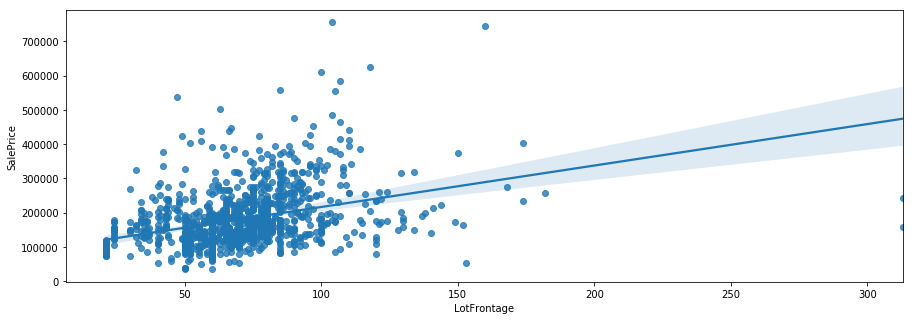

In [797]:
plt.figure(figsize=(15,5))
sns.regplot(x=train['LotFrontage'], y=train['SalePrice'])

There is a general linear relationship where, as the LotFrontage increases, the SalePrice increases. 

There are some missing values in the data, and let us ***handle it later***

In [798]:
for dataset in train_test_df:
    dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean())

###  LotShape

In [799]:
#train['LotShape'].value_counts()

In [800]:
#sns.swarmplot(x=train['LotShape'], y=train['SalePrice'])

I guess there is not much you can tell of the SalePrice from the LotShape, hence we shall drop it from the train and test dataset. 

In [801]:
#for dataset in train_test_df:
    #dataset.drop(['LotShape'], axis=1, inplace=True)

### Fill the rest of the test missing values
So we still need to account for the missing values in the test dataset. Let's go. 

In [802]:
test['Exterior2nd'].isnull().sum()

1

In [803]:
test['MSSubClass'] = test['MSSubClass'].fillna(test['MSSubClass'].mode()[0])
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])

In [804]:
test['BsmtFinSF2'].isnull().sum()

1

In [805]:
test['BsmtUnfSF'].isnull().sum()

1

In [806]:
test['TotalBsmtSF'].isnull().sum()

1

In [807]:
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

In [808]:
#test['BsmtFullBath'].unique()
test['BsmtHalfBath'].unique()

array([ 0.,  1., nan,  2.])

In [809]:
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])

In [810]:
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

In [811]:
test['Functional'].unique()

array(['Typ', 'Min2', 'Min1', 'Mod', 'Maj1', 'Sev', 'Maj2', nan],
      dtype=object)

In [812]:
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])

In [813]:
test['GarageCars'].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5., nan])

In [814]:
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mode()[0])
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

### Check the data

In [815]:
missing_cols_train = [col for col in train.columns if train[col].isnull().any()]
missing_cols_test = [col for col in test.columns if test[col].isnull().any()]
missing_cols_test
missing_cols_train

[]

In [816]:
train.shape

(1460, 77)

In [817]:
test.shape

(1459, 76)

### SF
We can further simplify square feet by adding certain areas and removing subsets of square feet.

In [818]:
train['TotalInnerSF'] = train['1stFlrSF'] + train['2ndFlrSF']
test['TotalInnerSF'] = test['1stFlrSF'] + test['2ndFlrSF']



for dataset in train_test_df:
    dataset.drop(['BsmtFinSF2', 'BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','MoSold'], axis=1, inplace=True)



# Statistical analysis

(Conduct after getting predictions and making improvements to the model)

We shall make observations on features that include:
- year
- numerical features broken down into continuous and discrete variables. 
- catagorical variables that are ordinal, nomimal

In [819]:
# Retrieve all the different type of variables
numerical_cols = [col for col in train.columns if train[col].dtype != 'object']
year_cols = [col for col in numerical_cols if 'Year' in col or 'Yr' in col]
discrete_cols = [col for col in numerical_cols if len(train[col].unique()) < 20 and col not in year_cols + ['Id']]
continuous_cols = [col for col in numerical_cols if col not in discrete_cols + year_cols + ['Id']]
object_cols = [col for col in train.columns if train[col].dtype == 'object']
continuous_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice',
 'TotalInnerSF']

In [820]:
#year 
#We know that year is a continous variable, and we want to plot the year against SalePrice
year_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0,0.5,'Average house Price')

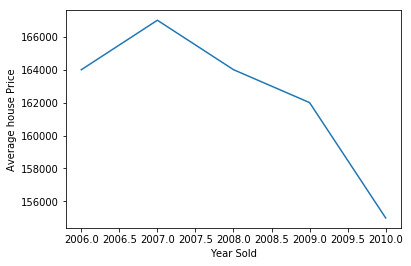

In [821]:
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Average house Price')


In [822]:
#We first check the age of the house. My intuition tells me that the older the house, the cheaper it should be.
#We can introduce a new column to state the age of the house. 
#So we should plot age of house vs SalePrice
for dataset in train_test_df:
    dataset['Age'] = dataset['YrSold'] - dataset['YearBuilt']

In [823]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalInnerSF,Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2008,WD,Normal,208500,1710,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,2007,WD,Normal,181500,1262,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,2008,WD,Normal,223500,1786,7
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2006,WD,Abnorml,140000,1717,91
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,2008,WD,Normal,250000,2198,8


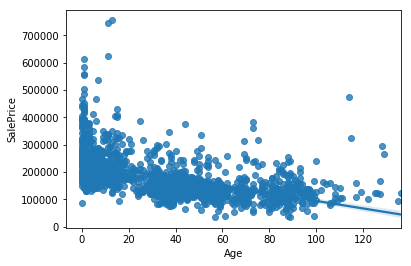

In [824]:
sns.regplot(x=train['Age'], y=train['SalePrice'])

We can tell that as the age of the house increases, the price decreases. Include. 

In [825]:
#For remodelling, we can imagine that if there has been a recent remodelling of a house, the price should increase. 
#We can add a column that states if the house has been remoded or not. 
#Legend: If not remoded, yr built ==  yr remod.

def Remodded(row):
    if row.YearBuilt == row.YearRemodAdd:
        #Means no remod
        row['Remodded'] = 0
    else:
        row['Remodded'] = 1
    return row

#Use apply on a singular column
for dataset in train_test_df:
    dataset['Remodded'] = dataset.apply(Remodded, axis=1)['Remodded']

    

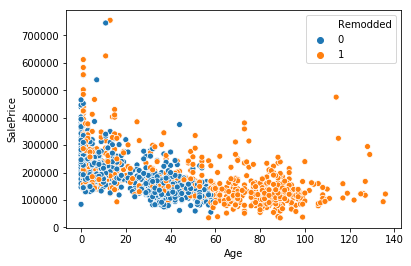

In [826]:
sns.scatterplot(x=train['Age'], y=train['SalePrice'], hue=train['Remodded'])

This tells us that houses get remodded after the age of 60, and after getting remoded, there is a slight increase in price. Include.

In [827]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalInnerSF,Age,Remodded
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2008,WD,Normal,208500,1710,5,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,2007,WD,Normal,181500,1262,31,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,2008,WD,Normal,223500,1786,7,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2006,WD,Abnorml,140000,1717,91,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,2008,WD,Normal,250000,2198,8,0


In [828]:
#Now i want to settle garage age.
# Yr Sold - garage blt year
for dataset in train_test_df:
    dataset['GarageAge'] = dataset['YrSold'] - dataset['GarageYrBlt']

In [829]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalInnerSF,Age,Remodded,GarageAge
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2008,WD,Normal,208500,1710,5,0,5.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,2007,WD,Normal,181500,1262,31,0,31.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,2008,WD,Normal,223500,1786,7,1,7.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2006,WD,Abnorml,140000,1717,91,1,8.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,2008,WD,Normal,250000,2198,8,0,8.0


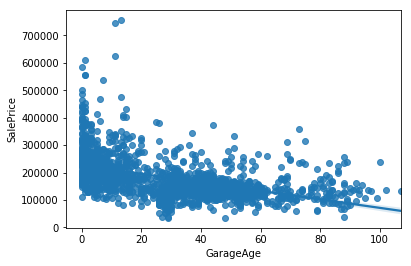

In [830]:
sns.regplot(x=train['GarageAge'], y=train['SalePrice'])

As the garage age increases, the saleprice decreases. Include.

In [831]:
#Drop the uneccessary year features
for dataset in train_test_df:
    dataset.drop(['YearBuilt', 'YrSold', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

In [832]:
#discrete variables
discrete_cols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea']

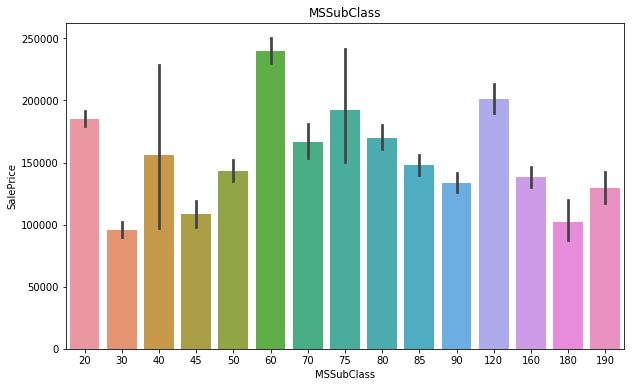

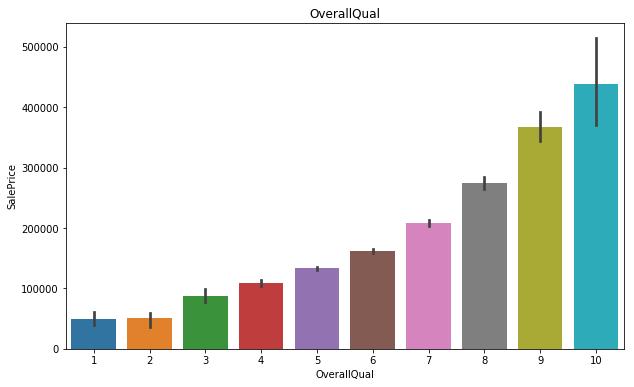

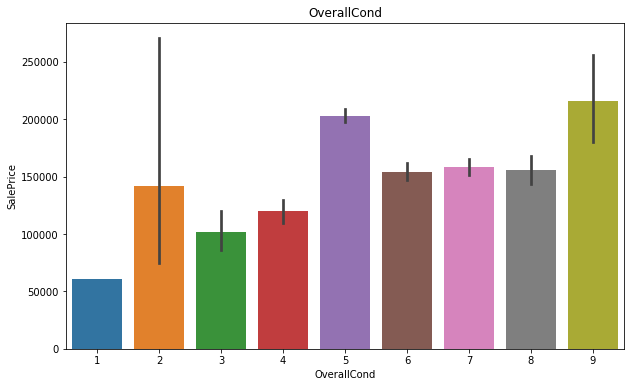

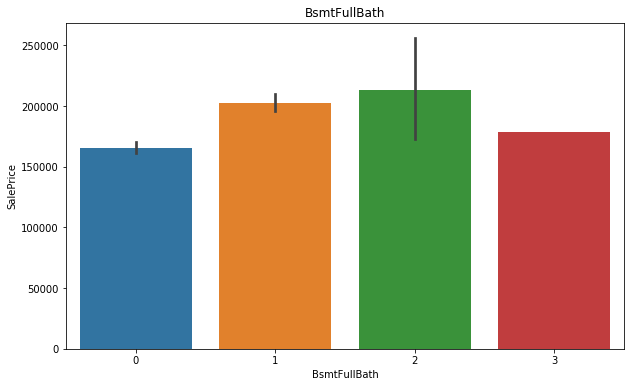

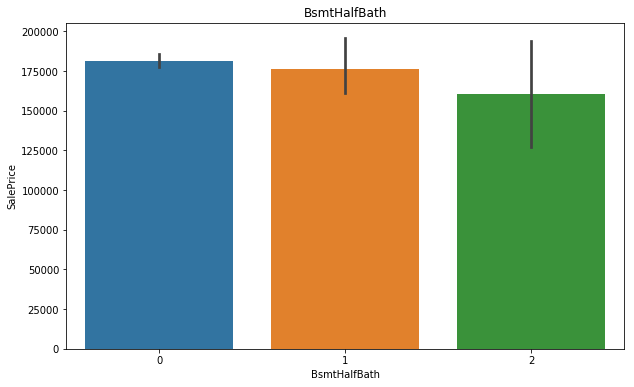

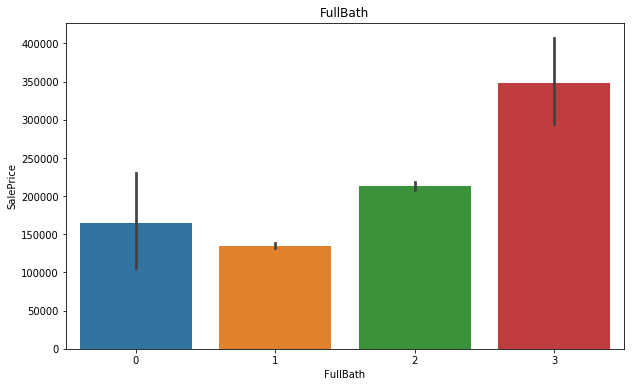

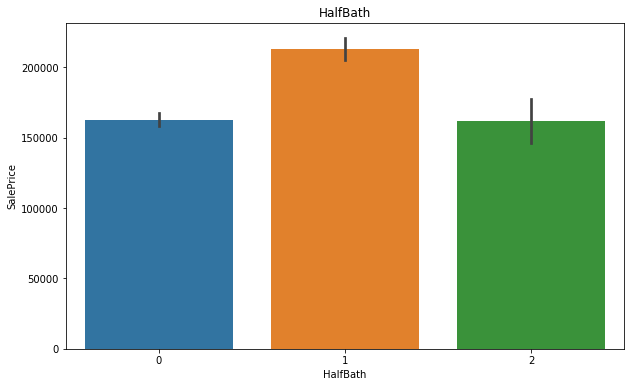

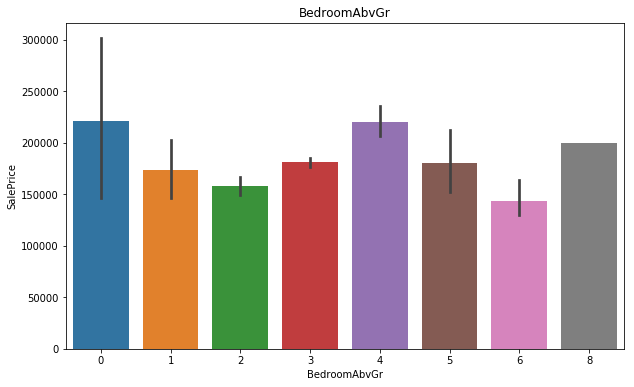

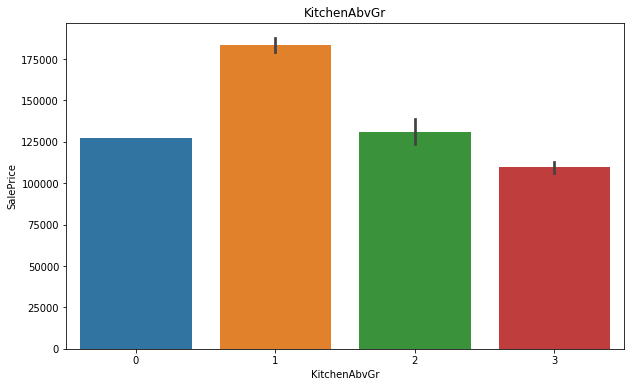

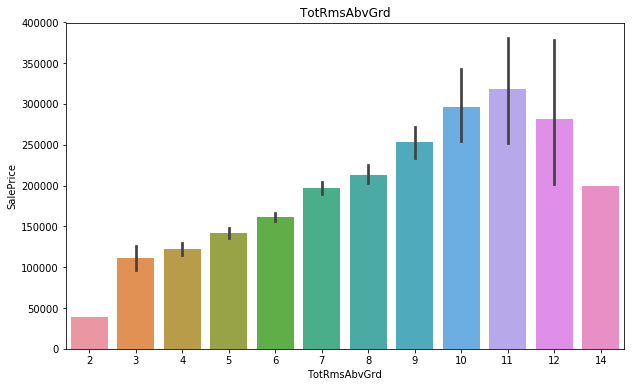

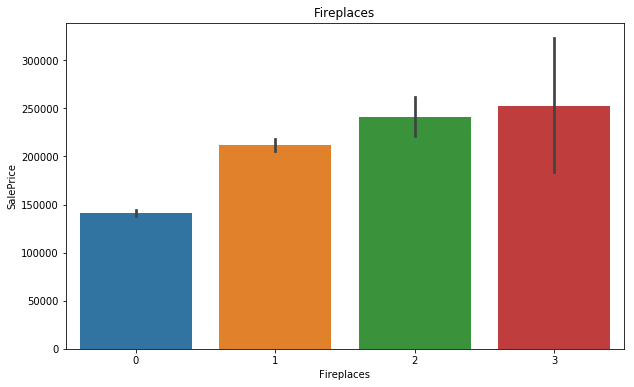

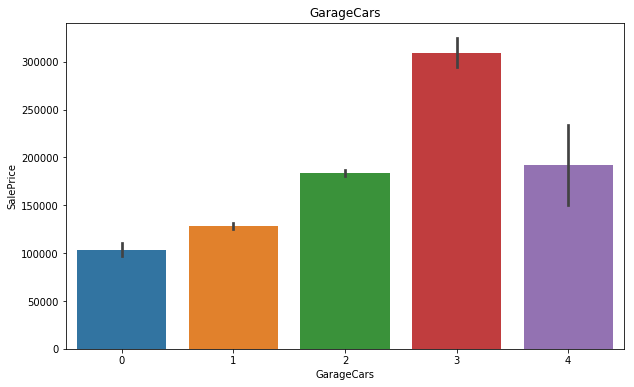

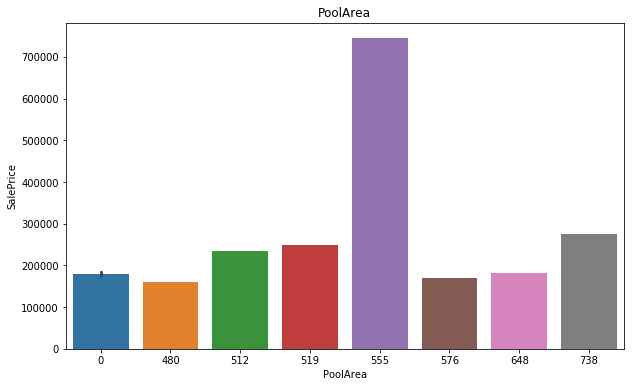

In [833]:
for feature in discrete_cols:
    train_copy = train.copy()
    plt.figure(figsize=(10,6))
    plt.title(feature)
    sns.barplot(x=train_copy[feature], y=train_copy['SalePrice'])

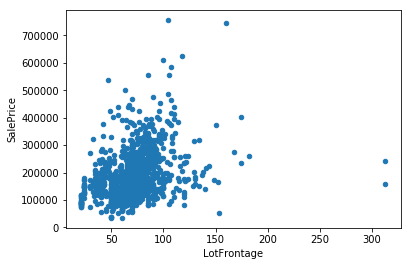

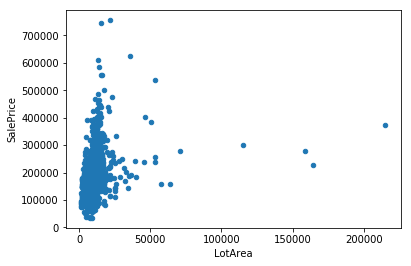

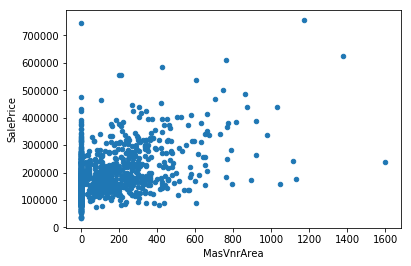

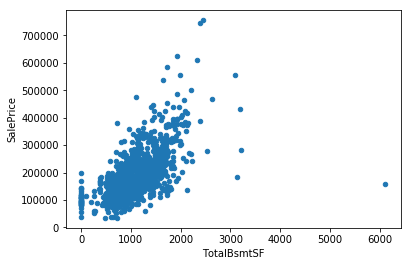

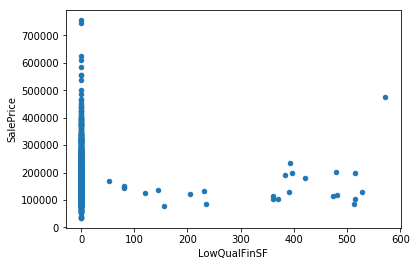

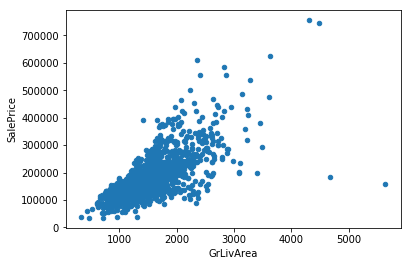

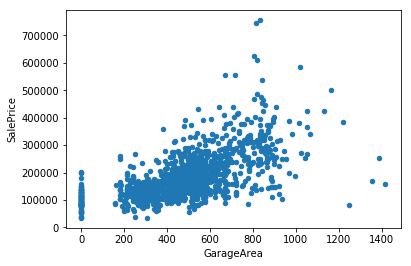

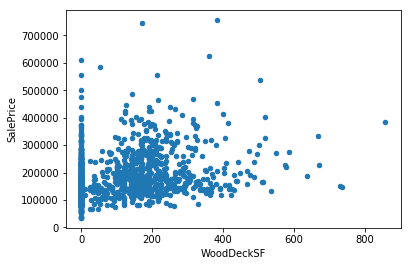

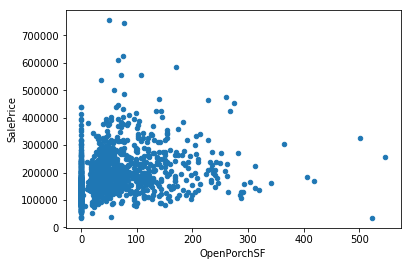

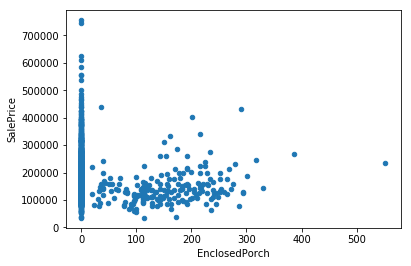

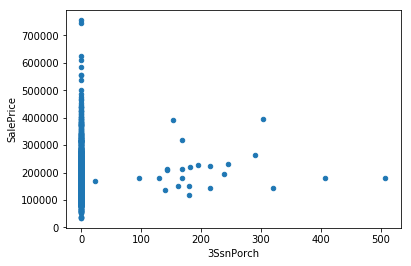

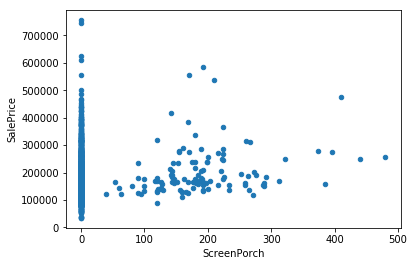

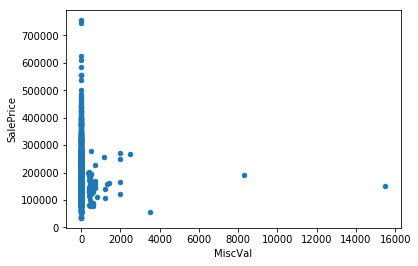

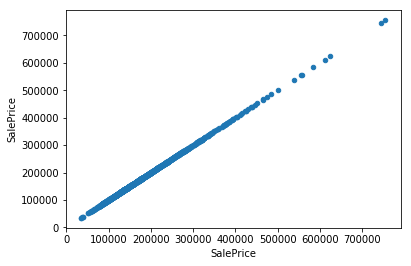

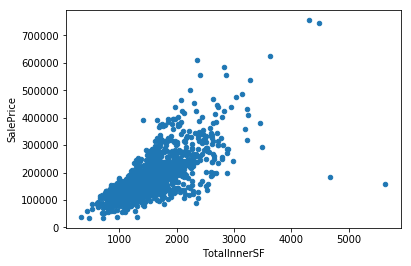

In [834]:
#Continuous variables, we can use a scatter plot to see the relationship

for feature in continuous_cols:
    train_copy = train.copy()
    train_copy.plot.scatter(x=feature, y='SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [835]:
#Drop the uneccessary year features
for dataset in train_test_df:
    dataset.drop(['3SsnPorch', 'MiscVal', 'LowQualFinSF'], axis=1, inplace=True)

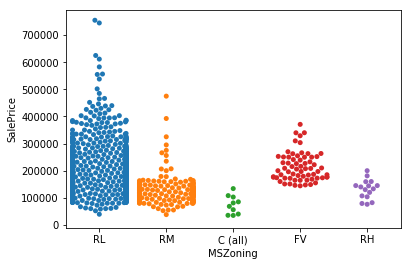

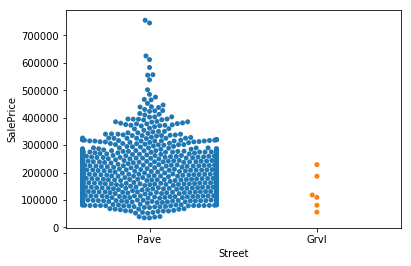

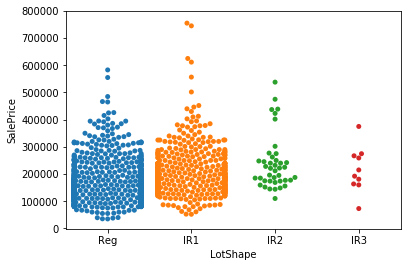

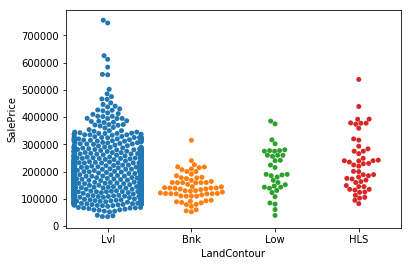

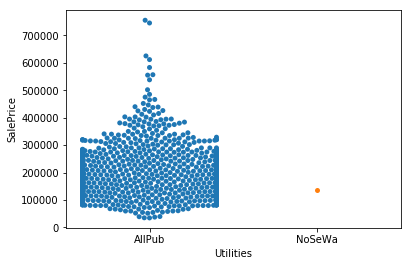

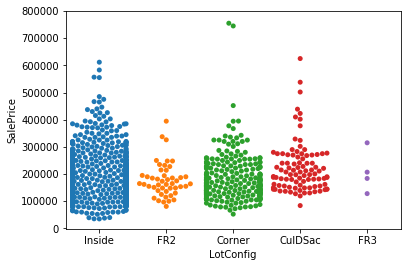

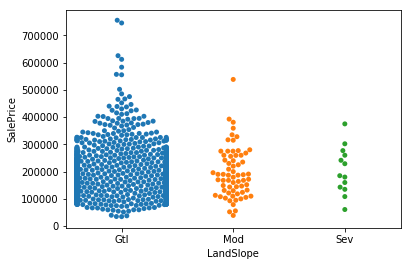

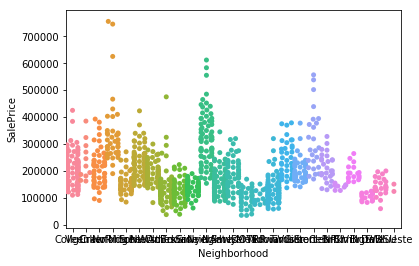

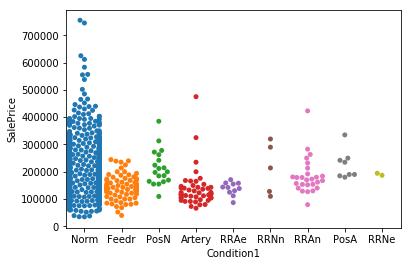

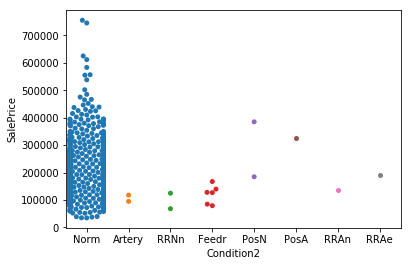

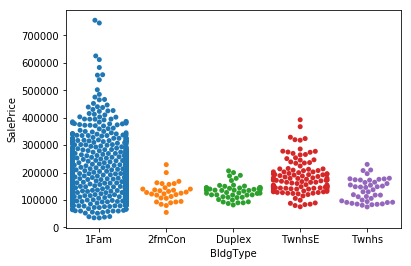

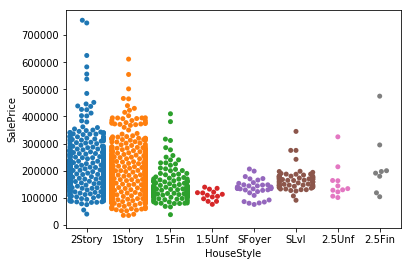

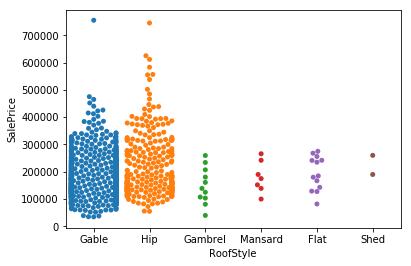

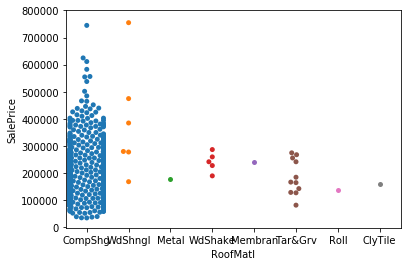

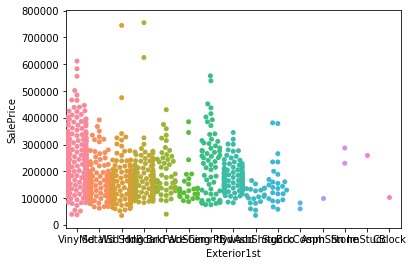

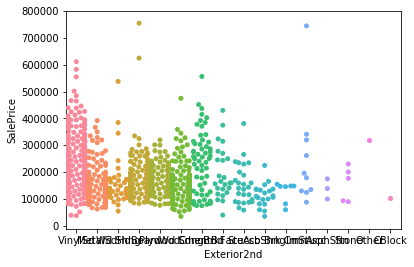

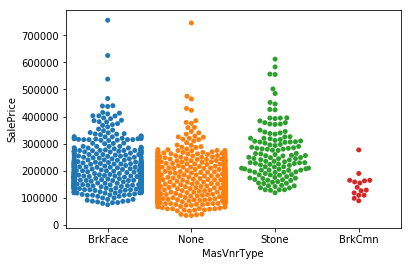

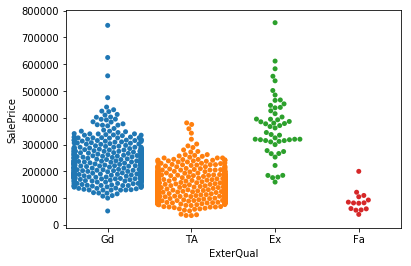

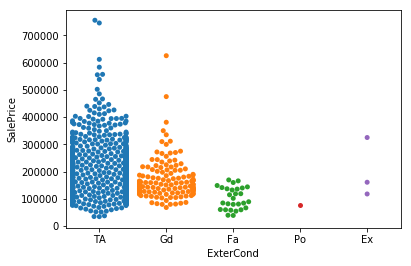

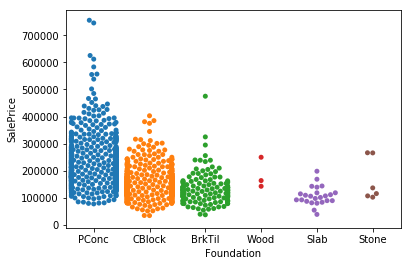

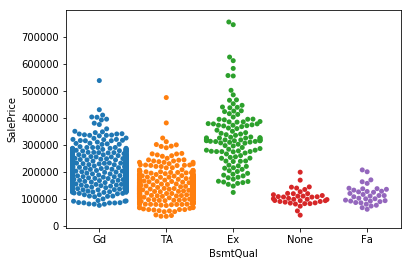

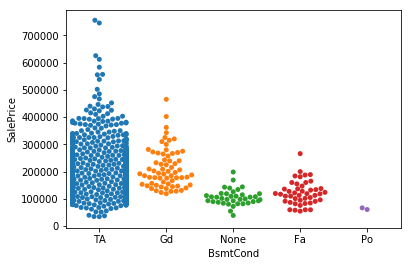

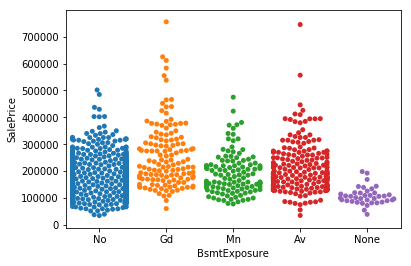

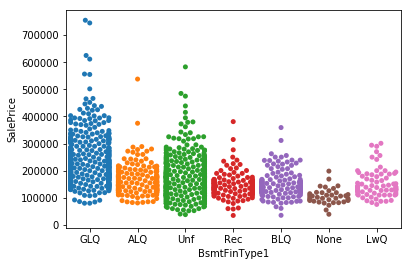

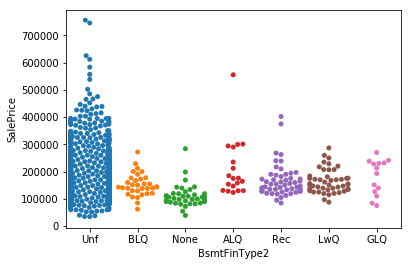

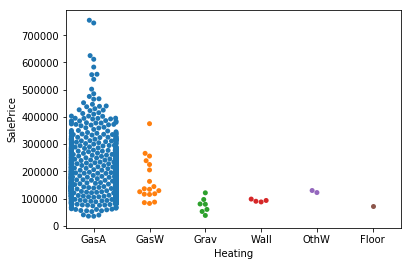

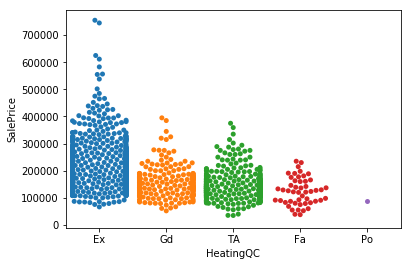

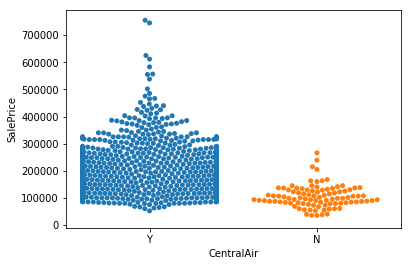

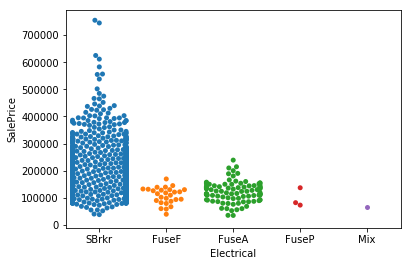

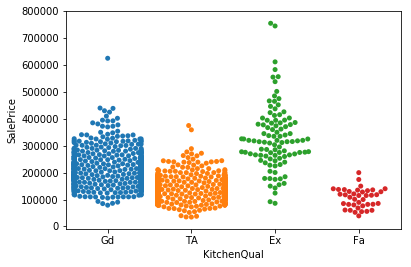

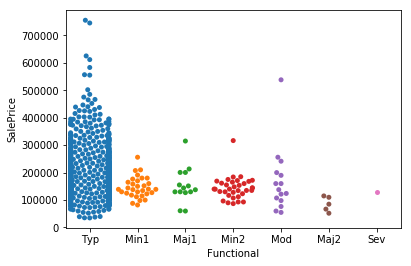

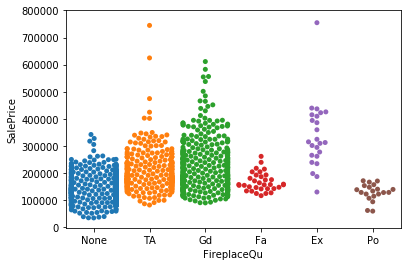

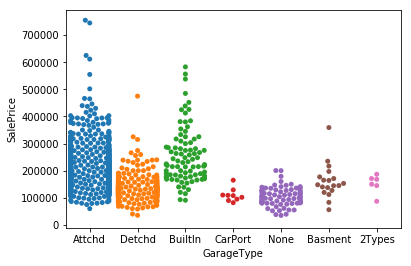

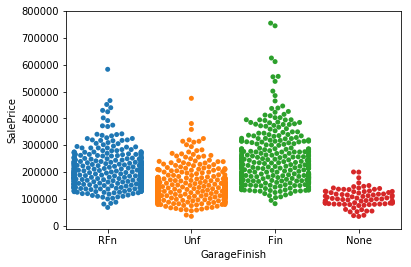

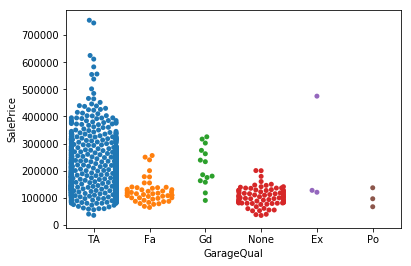

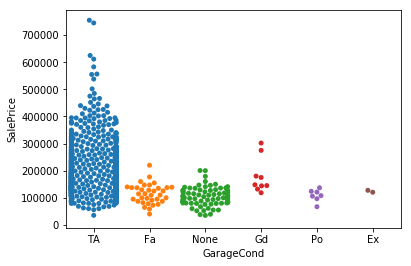

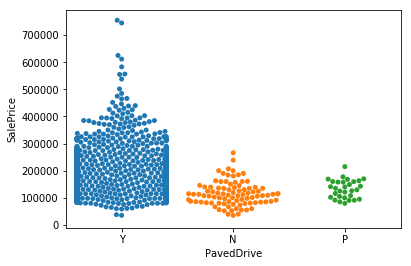

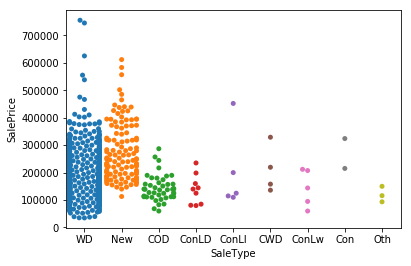

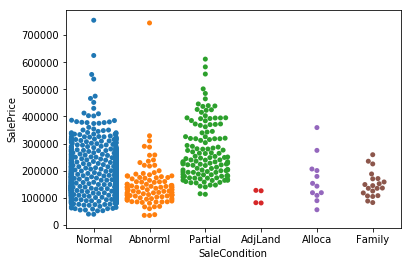

In [836]:
#Categorical variables
for feature in object_cols:
    train_copy = train.copy()
    sns.swarmplot(x=train_copy[feature], y=train_copy['SalePrice'])
    #train_copy.groupby(feature)['SalePrice'].median().plot.bar(x=feature, y='SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [837]:
for dataset in train_test_df:
    dataset.drop(['LotShape', 'Utilities', 'LandSlope'], axis=1, inplace=True)

# Catagorical variables 

In [838]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice,TotalInnerSF,Age,Remodded,GarageAge
0,1,60,RL,65.0,8450,Pave,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,WD,Normal,208500,1710,5,0,5.0
1,2,20,RL,80.0,9600,Pave,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,WD,Normal,181500,1262,31,0,31.0
2,3,60,RL,68.0,11250,Pave,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,WD,Normal,223500,1786,7,1,7.0
3,4,70,RL,60.0,9550,Pave,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,WD,Abnorml,140000,1717,91,1,8.0
4,5,60,RL,84.0,14260,Pave,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,WD,Normal,250000,2198,8,0,8.0


### Encoding

In [839]:
#LotShape may be included
label_encoded_cols = ['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 
                      'BldgType', 'HouseStyle', 'RoofMatl','Exterior1st','Exterior2nd', 'MasVnrType','ExterQual','ExterCond',
                     'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical',
                     'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageCars','GarageQual',
                      'GarageCond','SaleType','SaleCondition']

binary_cols = ['CentralAir','Street']

#manual_binning = ['AgeGarage','Age', LotFrontage','LotArea','YearBuilt', 'YearRemodAdd','MasVnrArea','TotalBsmtSF','GarageYrBlt', 'TotalInnerSF,'LowQualFinSF','GrLivArea','GarageArea']

oh_encoded_cols = ['Neighborhood', 'Condition1', 'Condition2', 'RoofStyle','Heating','PavedDrive']

### Binary

In [840]:
#CentralAir
central_air_mapping = {'N': 0, 'Y': 1}
street_mapping = {'Grvl':0, 'Pave':1}

for dataset in train_test_df:
    dataset['Street'] = dataset['Street'].map(street_mapping)
    dataset['CentralAir'] = dataset['CentralAir'].map(central_air_mapping)

In [841]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,TotalInnerSF,Age,Remodded,GarageAge
0,1461,20,RH,80.0,11622,1,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,LwQ,882.0,GasA,TA,1,SBrkr,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,Unf,1.0,730.0,TA,TA,Y,140,0,0,120,0,WD,Normal,896,49,0,49.0
1,1462,20,RL,81.0,14267,1,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,Unf,1329.0,GasA,TA,1,SBrkr,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,WD,Normal,1329,52,0,52.0
2,1463,60,RL,74.0,13830,1,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,Unf,928.0,GasA,Gd,1,SBrkr,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,WD,Normal,1629,13,1,13.0
3,1464,60,RL,78.0,9978,1,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,6,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,Unf,926.0,GasA,Ex,1,SBrkr,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,WD,Normal,1604,12,0,12.0
4,1465,120,RL,43.0,5005,1,HLS,Inside,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,1280.0,GasA,Ex,1,SBrkr,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,RFn,2.0,506.0,TA,TA,Y,0,82,0,144,0,WD,Normal,1280,18,0,18.0


In [842]:
test.shape

(1459, 64)

In [843]:
train.shape

(1460, 65)

**Important** Here, we need to combine the dataframes since some of the catagorical variables's values found in the test data don't match with training data.

In [844]:
train_copy = train.copy()
test_copy = test.copy()

combined_df = pd.concat([train_copy, test_copy], axis=0)

In [845]:
combined_df.shape

(2919, 65)

In [846]:
combined_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice,TotalInnerSF,Age,Remodded,GarageAge
1454,2915,160,RM,21.0,1936,1,Lvl,Inside,MeadowV,Norm,Norm,Twnhs,2Story,4,7,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,Unf,546.0,GasA,Gd,1,SBrkr,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,None,None,None,0.0,0.0,None,None,Y,0,0,0,0,0,WD,Normal,NaN,1092,36,0,27.0
1455,2916,160,RM,21.0,1894,1,Lvl,Inside,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,Unf,546.0,GasA,TA,1,SBrkr,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,None,CarPort,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,WD,Abnorml,NaN,1092,36,0,36.0
1456,2917,20,RL,160.0,20000,1,Lvl,Inside,Mitchel,Norm,Norm,1Fam,1Story,5,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,Unf,1224.0,GasA,Ex,1,SBrkr,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,WD,Abnorml,NaN,1224,46,1,46.0
1457,2918,85,RL,62.0,10441,1,Lvl,Inside,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,912.0,GasA,TA,1,SBrkr,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,None,None,None,0.0,0.0,None,None,Y,80,32,0,0,0,WD,Normal,NaN,970,14,0,27.0
1458,2919,60,RL,74.0,9627,1,Lvl,Inside,Mitchel,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,Unf,996.0,GasA,Ex,1,SBrkr,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,WD,Normal,NaN,2000,13,1,13.0


### Label Encoding

In [847]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in label_encoded_cols:
    combined_df[col] = label_encoder.fit_transform(combined_df[col])

In [848]:
combined_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice,TotalInnerSF,Age,Remodded,GarageAge
0,1,5,3,65.0,8450,1,3,4,CollgCr,Norm,Norm,0,5,7,5,Gable,1,12,13,1,196.0,2,4,2,2,4,3,2,6,856.0,GasA,0,1,4,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,1,2,2,548.0,5,5,Y,0,61,0,0,0,8,4,208500.0,1710,5,0,5.0
1,2,0,3,80.0,9600,1,3,2,Veenker,Feedr,Norm,0,2,6,8,Gable,1,8,8,2,0.0,3,4,1,2,4,1,0,6,1262.0,GasA,0,1,4,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,1,2,2,460.0,5,5,Y,298,0,0,0,0,8,4,181500.0,1262,31,0,31.0
2,3,5,3,68.0,11250,1,3,4,CollgCr,Norm,Norm,0,5,7,5,Gable,1,12,13,1,162.0,2,4,2,2,4,2,2,6,920.0,GasA,0,1,4,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,1,2,2,608.0,5,5,Y,0,42,0,0,0,8,4,223500.0,1786,7,1,7.0
3,4,6,3,60.0,9550,1,3,0,Crawfor,Norm,Norm,0,5,7,5,Gable,1,13,15,2,0.0,3,4,0,4,1,3,0,6,756.0,GasA,2,1,4,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,3,3,642.0,5,5,Y,0,35,272,0,0,8,0,140000.0,1717,91,1,8.0
4,5,5,3,84.0,14260,1,3,2,NoRidge,Norm,Norm,0,5,8,5,Gable,1,12,13,1,350.0,2,4,2,2,4,0,2,6,1145.0,GasA,0,1,4,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,1,2,3,836.0,5,5,Y,192,84,0,0,0,8,4,250000.0,2198,8,0,8.0


### One hot encoding

In [849]:
merged = combined_df.copy()
things_to_drop = []

for col in oh_encoded_cols: 
    things_to_drop.append(combined_df[col].unique()[1])
    dummies = pd.get_dummies(combined_df[col])
    merged = pd.concat([merged, dummies], axis=1)
    things_to_drop.append(col)

df = merged.drop(things_to_drop,axis=1)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice,TotalInnerSF,Age,Remodded,GarageAge,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Norm,PosA,PosN,RRAe,RRAn,RRNn,Flat,Gable,Gambrel,Mansard,Shed,Floor,GasA,Grav,OthW,Wall,P,Y
0,1,5,3,65.0,8450,1,3,4,0,5,7,5,1,12,13,1,196.0,2,4,2,2,4,3,2,6,856.0,0,1,4,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,1,2,2,548.0,5,5,0,61,0,0,0,8,4,208500.0,1710,5,0,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,2,0,3,80.0,9600,1,3,2,0,2,6,8,1,8,8,2,0.0,3,4,1,2,4,1,0,6,1262.0,0,1,4,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,1,2,2,460.0,5,5,298,0,0,0,0,8,4,181500.0,1262,31,0,31.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,3,5,3,68.0,11250,1,3,4,0,5,7,5,1,12,13,1,162.0,2,4,2,2,4,2,2,6,920.0,0,1,4,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,1,2,2,608.0,5,5,0,42,0,0,0,8,4,223500.0,1786,7,1,7.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,4,6,3,60.0,9550,1,3,0,0,5,7,5,1,13,15,2,0.0,3,4,0,4,1,3,0,6,756.0,2,1,4,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,3,3,642.0,5,5,0,35,272,0,0,8,0,140000.0,1717,91,1,8.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,5,5,3,84.0,14260,1,3,2,0,5,8,5,1,12,13,1,350.0,2,4,2,2,4,0,2,6,1145.0,0,1,4,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,1,2,3,836.0,5,5,192,84,0,0,0,8,4,250000.0,2198,8,0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,13,4,21.0,1936,1,3,4,3,5,4,7,1,5,5,2,0.0,3,4,1,4,4,3,6,6,546.0,2,1,4,1092,0.0,0.0,1,1,3,1,3,5,6,0,3,6,1,0,0.0,3,3,0,0,0,0,0,8,4,NaN,1092,36,0,27.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1455,2916,13,4,21.0,1894,1,3,4,4,5,4,5,1,5,5,2,0.0,3,4,1,4,4,3,5,6,546.0,4,1,4,1092,0.0,0.0,1,1,3,1,3,6,6,0,3,4,3,1,286.0,5,5,0,24,0,0,0,8,0,NaN,1092,36,0,36.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1456,2917,0,3,160.0,20000,1,3,4,0,2,5,7,1,12,13,2,0.0,3,4,1,4,4,3,0,6,1224.0,0,1,4,1224,1.0,0.0,1,0,4,1,3,7,6,1,5,5,3,2,576.0,5,5,474,0,0,0,0,8,0,NaN,1224,46,1,46.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1457,2918,9,3,62.0,10441,1,3,4,0,6,5,5,1,6,15,2,0.0,3,4,2,2,4,0,2,6,912.0,4,1,4,970,0.0,1.0,1,0,3,1,3,6,6,0,3,6,1,0,0.0,3,3,80,32,0,0,0,8,4,NaN,970,14,0,27.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [850]:
df.shape

(2919, 108)

Here, we need to remove the duplicate columns as get_dummies resulted in duplicate columns.

In [851]:
'''
col_dic = {}
for col in df.columns:
    if col not in col_dic:
        col_dic[col] = 1
    elif col in col_dic:
        col_dic[col] = col_dic[col] + 1
duplicates = []
for key,val in col_dic.items():
    if val > 1:
        duplicates.append(key)
df.drop(duplicates, axis=1,inplace=True)
'''
df = df.loc[:,~df.columns.duplicated()]

In [852]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice,TotalInnerSF,Age,Remodded,GarageAge,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Flat,Gable,Gambrel,Mansard,Shed,Floor,GasA,Grav,OthW,Wall,P,Y
0,1,5,3,65.0,8450,1,3,4,0,5,7,5,1,12,13,1,196.0,2,4,2,2,4,3,2,6,856.0,0,1,4,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,1,2,2,548.0,5,5,0,61,0,0,0,8,4,208500.0,1710,5,0,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,2,0,3,80.0,9600,1,3,2,0,2,6,8,1,8,8,2,0.0,3,4,1,2,4,1,0,6,1262.0,0,1,4,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,1,2,2,460.0,5,5,298,0,0,0,0,8,4,181500.0,1262,31,0,31.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,3,5,3,68.0,11250,1,3,4,0,5,7,5,1,12,13,1,162.0,2,4,2,2,4,2,2,6,920.0,0,1,4,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,1,2,2,608.0,5,5,0,42,0,0,0,8,4,223500.0,1786,7,1,7.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,4,6,3,60.0,9550,1,3,0,0,5,7,5,1,13,15,2,0.0,3,4,0,4,1,3,0,6,756.0,2,1,4,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,3,3,642.0,5,5,0,35,272,0,0,8,0,140000.0,1717,91,1,8.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,5,5,3,84.0,14260,1,3,2,0,5,8,5,1,12,13,1,350.0,2,4,2,2,4,0,2,6,1145.0,0,1,4,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,1,2,3,836.0,5,5,192,84,0,0,0,8,4,250000.0,2198,8,0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [853]:
train_df = df.iloc[:1460,:]
test_df = df.iloc[1460:,:]

# Modelling

In [854]:
X = train_df.drop(['SalePrice','Id'], axis=1)
y = train_df['SalePrice']
test_df.drop(['SalePrice', 'Id'], axis=1, inplace=True)

C:\Users\Sanraj\anaconda3\envs\fastai\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [855]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

### Optimization of parameters

In [856]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

estimators = []
num = 100
while num <= 1000:
    estimators.append(num)
    num += 100
    
def get_score(n_estimators):
    my_model = XGBRegressor(n_estimators = n_estimators, learning_rate = 0.05)
    my_model.fit(X_train, y_train, early_stopping_rounds = 10, eval_set = [(X_valid, y_valid)], verbose = False)
    predictions = my_model.predict(X_valid)
    return mean_absolute_error(predictions, y_valid)
results = {}
for estimates in estimators:
    results[estimates] = get_score(estimates)

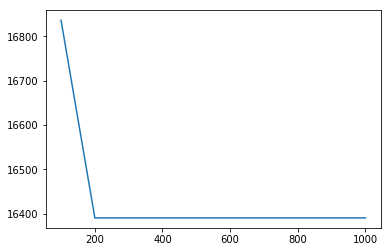

In [857]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

### Cross validation

In [858]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

estimators2 = []
num2 = 100
while num2 <= 500:
    estimators2.append(num2)
    num2 += 100

def get_score2(n_estimators):
    pipeline = Pipeline(steps=[('model', XGBRegressor(n_estimators = n_estimators, learning_rate = 0.05))])
    score = -1 * cross_val_score(pipeline, X, y, cv = 5, scoring='neg_mean_absolute_error')
    return score.mean()  

results2 = {}
for estimates2 in estimators2:
    results2[estimates2] = get_score2(estimates2)

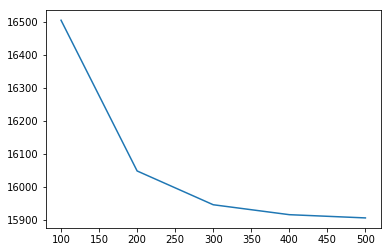

In [859]:
plt.plot(list(results2.keys()), list(results2.values()))
plt.show()

In [862]:
model = XGBRegressor(n_estimators = 500, learning_rate = 0.05)
model.fit(X,y)
preds = model.predict(test_df)

# Submission

In [863]:

my_submission = pd.DataFrame(preds, index = test['Id'])
my_submission.columns = ['SalePrice']
my_submission = my_submission.reset_index()
my_submission.to_csv('submission_14.csv',index=False)

